<a href="https://colab.research.google.com/github/tiandrefreitas/Linkedin_Plotly/blob/master/Linkedin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [57]:
df = pd.read_csv("sample_data/Connections.csv",quotechar='"',skipinitialspace=True)

In [6]:
df.head(2)

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Bruno,Rocha,NaN,Neon,Data Engineer,17 Aug 2020
1,Nathália,Tito,NaN,Globoplay,Data Scientist,17 Aug 2020


In [58]:
import datetime
def fun(date):    
  return datetime.datetime.strptime(date, "%d %b %Y").strftime("%Y-%m-%d")

df["Connected On"] = df["Connected On"].apply(fun)

In [59]:
df=df.sort_values(by="Connected On")

In [40]:

df.head(5)

,First Name,Last Name,Email Address,Company,Position,Connected On
2778,Lucas,Cantarelli,NaN,Nenhuma,Estudante,2011-05-09
2772,Pathy,Soares dos Santos,NaN,NaN,NaN,2011-07-06
2773,Dayana,Soares,NaN,Banco do Brasil,Gerente de Relacionamento,2011-07-06
2777,Sandro,Souza,NaN,Guia Muriaé,Editor-chefe,2011-07-06
2775,Kelly Farias,Farias,NaN,Hotel do Mar,Recepcionista,2011-07-06


In [61]:

df.reset_index(inplace=True)

In [42]:
df

,level_0,index,First Name,Last Name,Email Address,Company,Position,Connected On
0,0,2778,Lucas,Cantarelli,NaN,Nenhuma,Estudante,2011-05-09
1,1,2772,Pathy,Soares dos Santos,NaN,NaN,NaN,2011-07-06
2,2,2773,Dayana,Soares,NaN,Banco do Brasil,Gerente de Relacionamento,2011-07-06
3,3,2777,Sandro,Souza,NaN,Guia Muriaé,Editor-chefe,2011-07-06
4,4,2775,Kelly Farias,Farias,NaN,Hotel do Mar,Recepcionista,2011-07-06
...,...,...,...,...,...,...,...,...
2774,2774,2,Weslley,Sousa,NaN,EY,Engenheiro de Dados,2020-08-17
2775,2775,1,Nathália,Tito,NaN,Globoplay,Data Scientist,2020-08-17
2776,2776,6,Walter Jhameson,Xavier Pereira,NaN,Universidade Federal do Rio de Janeiro,Graduate Student,2020-08-17
2777,2777,15,Jorge,Kawamura,NaN,Bradesco,Cientista de Dados,2020-08-17


In [62]:

df.drop(columns="index",inplace=True)
df.rename(columns={"level_0":"number"},inplace=True)

In [63]:
connections_line = px.line(df, x="Connected On", y="number", title='My Connections')
connections_line.show()

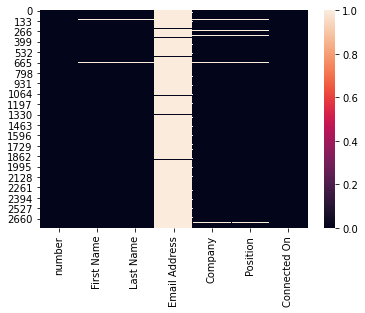

In [45]:
sns.heatmap(df.isnull())

In [64]:
df.drop(columns='Email Address',inplace=True)

In [65]:
df=df.dropna()

In [66]:
df.loc[df['Position'].str.contains('Intern'), 'Position'] = "Intern"

In [49]:
df.head()

,number,First Name,Last Name,Company,Position,Connected On
0,0,Lucas,Cantarelli,Nenhuma,Estudante,2011-05-09
2,2,Dayana,Soares,Banco do Brasil,Gerente de Relacionamento,2011-07-06
3,3,Sandro,Souza,Guia Muriaé,Editor-chefe,2011-07-06
4,4,Kelly Farias,Farias,Hotel do Mar,Recepcionista,2011-07-06
5,5,Fabricia,Oliveira,Grupo WSCOM,Jornalista,2011-07-06


In [67]:
Companies = df['Company']

In [68]:
hist_company = go.Figure()
hist_company.add_trace(go.Histogram(histfunc="count",  x=df["Company"]),)
hist_company.show()

In [52]:
fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count",  x=df["Position"]))
fig.show()

In [75]:
df['Linkedin Andre Freitas']= 'Linkedin Andre Freitas'

In [24]:
!pip install plotly==4.5.1

In [73]:
vc = df['Position'].value_counts()
u  = [i not in set(vc[vc==2].index) for i in df['Position']]
df = df[u]

In [76]:
position_tree_map = px.treemap(df, path=['Linkedin Andre Freitas', 'Position', 'Company'], width=1300, height=800)
position_tree_map.show()